# Q1

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output.csv')

In [3]:
data = df.iloc[:, 2:4]

In [4]:
def init(data, k): 
    (n, d) = data.shape
    mu_col = data.sum().to_numpy()/n
    sigma_col = data.std().to_numpy()

    m = np.dot(mu_col.reshape((d,1)), np.ones([1, k])) + np.dot(sigma_col.reshape((d,1)), np.random.rand(1,k))
    sigma = sigma_col.mean() * np.ones([1,k])[0]
    p = np.ones([1,k])/k

    return m, sigma, p[0]



In [5]:
def e_step(data, m, sigma, p, k, n):
    ret = np.zeros((k,n))

    for i in range(k): 
        for j in range(n):
            c = 1/((np.sqrt(2*np.pi)*sigma[i])**2)
            diff = (data.to_numpy()[j] - m[:, i])**2
            e = np.exp(-0.5* diff.sum() / sigma[i]**2)
            ret[i, j] = p[i] * c * e
            denom = ret.sum(axis=0)

    return ret/denom    


In [6]:
def m_step(data, p, k, d):
    mu = np.zeros((d, k))
    for i in range(k):
        for j in range(d):
            mu[j,i] = np.dot(data.to_numpy()[:,j],p[i,:].transpose()) / p[i].sum()

    sigma = np.zeros((1, k))
    for i in range(k):
        nume = 0
        dist = (data.to_numpy() - mu[:, i])**2
        for j in range(len(dist)):
            nume += dist[j].sum() * p[i,j]
        sigma[0,i] = np.sqrt( nume / (p[i].sum() * d ))

    new_p = 1/len(data.to_numpy()) * p.sum(axis=1)
    return mu, sigma[0], new_p


In [7]:
def em(data, n, k):

    mu, sigma, p = init(data, k)
    num_obs = len(data)
    dim = len(data.columns)

    colors = ['r', 'g', 'b', 'k', 'y']
    
    for i in range(n):
        p_cond = e_step(data, mu, sigma, p, k, num_obs)
        mu, sigma, p = m_step(data, p_cond, k, dim)
        for j in range(k):
            plt.scatter(mu[0][j], mu[1][j], s=10*i+10, c=colors[j])

    return mu


array([[3.30888956, 2.7347733 , 6.1908721 , 6.56869509],
       [1.15986347, 1.00752171, 1.7658236 , 1.84427261]])

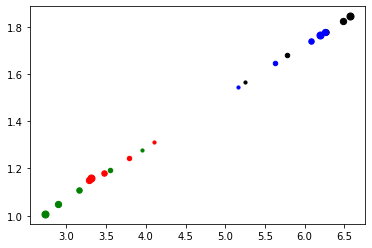

In [8]:
em(data, 5, 4)